### Projet fait en binôme: Mariana DUTRA DINIZ COSTA et Felipe SCHERER VICENTIN

In [13]:
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

## Simulation of Markov chain

In [2]:
def sample_exp(lamb, n=1):
    U = np.random.rand(n)
    return - np.log(U) / lamb


def sample_class(p: Union[list, tuple, np.array]=None, n=1):
    if p is None:
        p = [0.5, 0.5]
    if isinstance(p, (list, tuple)):
        p = np.array(p)

    if np.abs(np.sum(p) - 1) > 1e-10:
        raise ValueError("Probabilities should add up to 1.")
        
    cum_probs = np.cumsum(p).reshape(p.size, 1)
    U = np.random.rand(1, n)
    return np.argmax(U < cum_probs, axis=0)

In [3]:
def parse_Q(Q):
    diag_Q = np.diagonal(Q)
    
    lambdas = np.abs(diag_Q)
    P = (Q - np.diag(diag_Q)) / lambdas.reshape(N, 1)

    return P, lambdas

In [4]:
def markov_chain(sampler, P, lambdas, max_iters=100):
    if isinstance(lambdas, (list, tuple)):
        lambdas = np.array(lambdas)
    if isinstance(P, (list, tuple)):
        P = np.array(P)

    x = [sampler()]
    T = [0]

    for _ in range(max_iters):
        last_x = x[-1]
        last_T = T[-1]
        
        epsilon = sample_exp(lambdas[last_x])[0]
        
        x.append(sample_class(P[last_x])[0])
        T.append(last_T + epsilon)
        
    return np.array(x), np.array(T)

In [5]:
N = 60

lamb = 0.5
mu = 0.5

upper_diag = (N - 1) * [lamb]
main_diag = [-lamb] + [- (lamb + mu)] + (N - 3) * [- (lamb + 2 * mu)] + [-2*mu]
lower_diag = [mu] + (N - 2) * [2 * mu]

Q = np.diag(upper_diag, k=1) + np.diag(main_diag) + np.diag(lower_diag, k=-1)

In [6]:
P, lambdas = parse_Q(Q)
x, T = markov_chain(lambda: 0, P, lambdas, 1_000)

print(x)

[0 1 2 ... 2 1 0]


## Simulation of SIR

In [10]:
def create_system(beta, gamma):
    def system(t, y):
        s, i, r = y
        
        ds = -beta * i * s
        di = beta * i * s - gamma * i
        dr = gamma * i
        
        return [ds, di, dr]
        
    return system 

In [46]:
def SIR(N, t_span, beta, gamma):
    system = create_system(beta, gamma)
    y0 = [1-1/N, 1/N, 0]

    sol = solve_ivp(system, t_span, y0)
    
    return sol.t, sol.y[0], sol.y[1], sol.y[2]

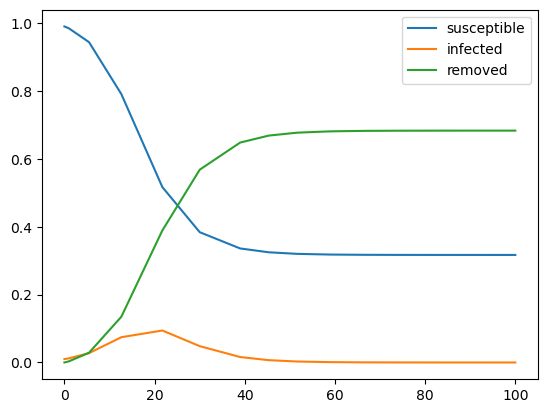

In [55]:
t, s, i, r = SIR(100, (0,100), 0.5,0.3)
plt.plot(t, s, label='susceptible')
plt.plot(t, i, label='infected')
plt.plot(t, r, label='removed')
plt.legend()
plt.show()